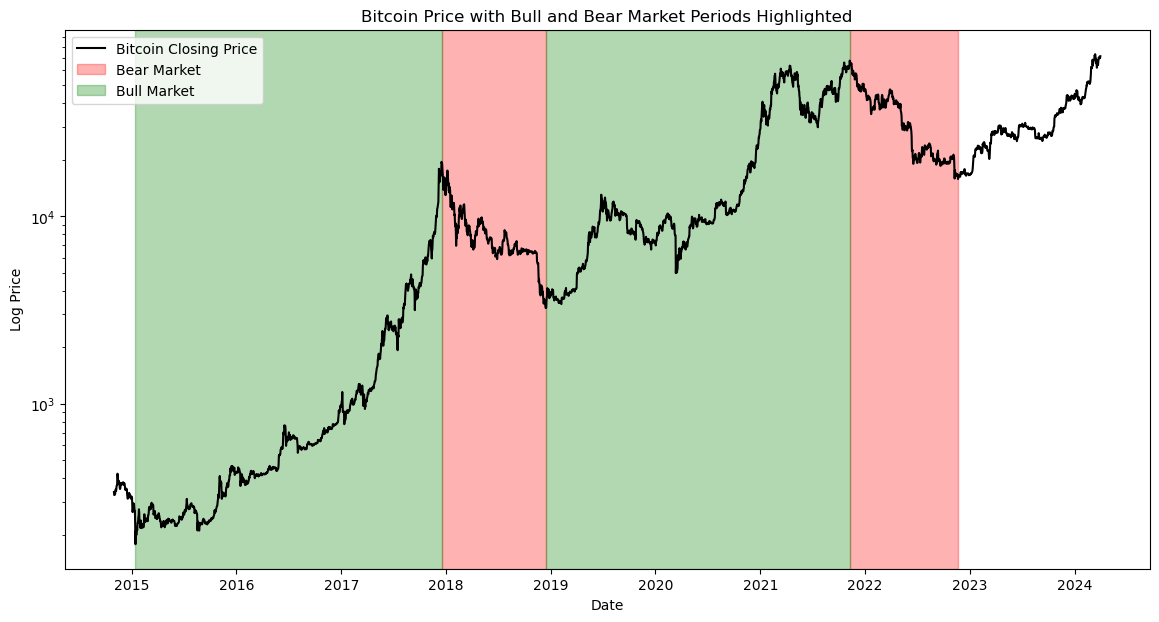

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset and convert Date column to datetime format
btc_data = pd.read_csv('/Users/thomas/Documents/GitHub/CNN-LSTM/Models_v2/Final_df/BTC_FINAL_df_class.csv')
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

# Define the date ranges for bull and bear markets
date_ranges = {
    'bear_market_1': ('2017-12-17', '2018-12-15'),
    'bear_market_2': ('2021-11-10', '2022-11-21'),
    'bull_market_1': ('2015-01-14', '2017-12-17'),
    'bull_market_2': ('2018-12-15', '2021-11-10')
}

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the Bitcoin closing prices with a log scale
ax.plot(btc_data['Date'], btc_data['Close'], label='Bitcoin Closing Price', color='black')
ax.set_yscale('log')

# Highlight the bull and bear markets
for period, (start_date, end_date) in date_ranges.items():
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    if 'bull' in period:
        color = 'green'
        label = 'Bull Market'
    else:
        color = 'red'
        label = 'Bear Market'
    ax.axvspan(start_date, end_date, color=color, alpha=0.3, label=label)

# Remove duplicate labels
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

# Add title and labels
ax.set_title('Bitcoin Price with Bull and Bear Market Periods Highlighted')
ax.set_xlabel('Date')
ax.set_ylabel('Log Price')

# Show the plot
plt.show()

# save the plot
fig.savefig('BTC_price_bull_bear.png')


In [1]:
import pandas as pd

# Load the datasets and convert Date column to datetime format
btc_data_regression = pd.read_csv('../../../Data/Final_df/BTC_FINAL_df.csv')
btc_data_classification = pd.read_csv('../../../Data/Final_df/BTC_FINAL_df_class.csv')
btc_data_regression['Date'] = pd.to_datetime(btc_data_regression['Date'])
btc_data_classification['Date'] = pd.to_datetime(btc_data_classification['Date'])

# Define the date ranges for bull and bear markets
date_ranges = {
    'bear_market_1': ('2017-12-17', '2018-12-15'),
    'bear_market_2': ('2021-11-10', '2022-11-21'),
    'bull_market_1': ('2015-01-14', '2017-12-17'),
    'bull_market_2': ('2018-12-15', '2021-11-10')
}

# Function to filter data based on date range
def filter_data(data, start_date, end_date):
    filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]
    return filtered_data

# Create distinct datasets for each period for both regression and classification datasets
datasets_regression = {}
datasets_classification = {}
for period, (start_date, end_date) in date_ranges.items():
    datasets_regression[period] = filter_data(btc_data_regression, pd.to_datetime(start_date), pd.to_datetime(end_date))
    datasets_classification[period] = filter_data(btc_data_classification, pd.to_datetime(start_date), pd.to_datetime(end_date))

# Save each dataset to a separate CSV file
for period, data in datasets_regression.items():
    data.to_csv(f'../../../Data/Final_df/{period}_regression.csv', index=False)

for period, data in datasets_classification.items():
    data.to_csv(f'../../../Data/Final_df/{period}_classification.csv', index=False)
